# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df=pd.merge(mouse_metadata,study_results)

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [87]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique()

249

In [88]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice_df=combined_data_df[combined_data_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicate_mice_df['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data=combined_data_df[combined_data_df['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df['Mouse ID'] != 'g989']
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data_df['Mouse ID'].nunique()
number_of_mice_clean


248

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_regimen = clean_data_df.groupby('Drug Regimen')

summary_stats ={
    'Mean Tumor Volume': [],
    'Median Tumor Volume': [],
    'Tumor Volume Variance': [],
    'Tumor Volume Std. Dev.': [],
    'Tumor Volume Std. Err.': []}

for drug, subset in grouped_regimen:
    summary_stats['Mean Tumor Volume'].append(subset['Tumor Volume (mm3)'].mean())
    summary_stats['Median Tumor Volume'].append(subset['Tumor Volume (mm3)'].median())
    summary_stats['Tumor Volume Variance'].append(subset['Tumor Volume (mm3)'].var())
    summary_stats['Tumor Volume Std. Dev.'].append(subset['Tumor Volume (mm3)'].std())
    summary_stats['Tumor Volume Std. Err.'].append(subset['Tumor Volume (mm3)'].sem())

regimen_summary_df = pd.DataFrame(summary_stats, index=grouped_regimen.groups.keys())
regimen_summary_df_sorted = regimen_summary_df.sort_index()

regimen_summary_df_sorted

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [93]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

regimen_summary_advanced = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_SEM='sem'
).reset_index()

regimen_summary_advanced

,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

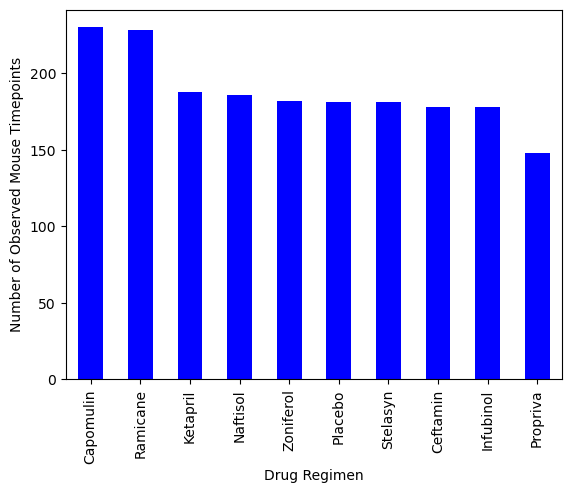

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_data_counts = clean_data_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

regimen_data_counts.plot(kind='bar', color= 'blue')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.show()



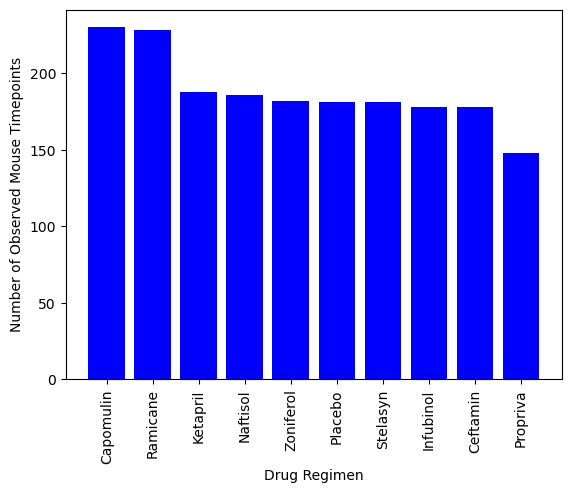

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data_df['Drug Regimen'].value_counts()

plt.bar(regimen_counts.index, regimen_counts.values, color='blue')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.xticks(rotation=90)


plt.show()

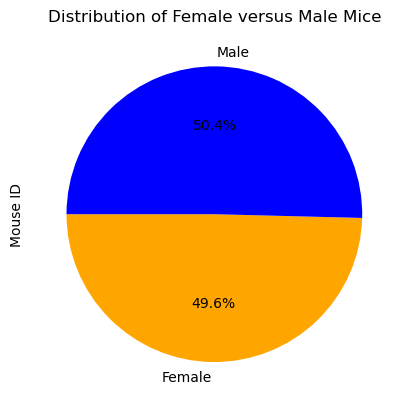

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_distribution = clean_data_df.groupby('Sex')['Mouse ID'].nunique()

mice_distribution.plot(kind='pie',autopct='%1.1f%%', colors=['orange', 'blue'], labels=['Female', 'Male'],startangle=180)
plt.title('Distribution of Female versus Male Mice')

plt.show()

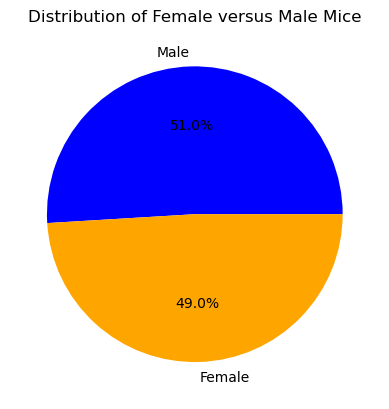

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_distribution = clean_data_df['Sex'].value_counts()

plt.pie(mice_sex_distribution, labels=mice_sex_distribution.index, autopct='%1.1f%%', colors=['blue','orange'], startangle=360)
plt.title('Distribution of Female versus Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [99]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    quartiles = final_volume_data.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # add subset 
    # Determine outliers using upper and lower bounds
    outliers = final_volume_data[(final_volume_data < lower_bound) | (final_volume_data > upper_bound)]
    tumor_vol_data.append(final_volume_data)

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


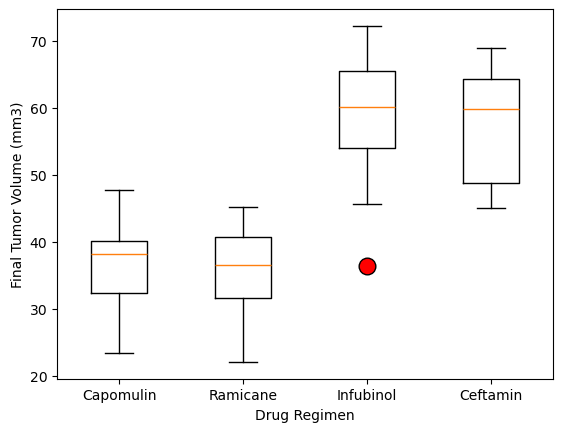

In [100]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12})

plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

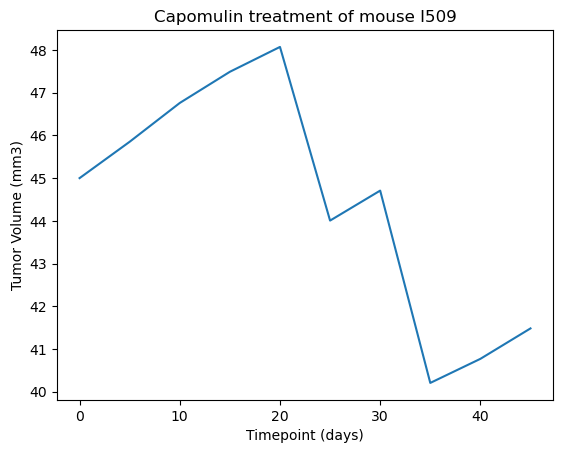

In [101]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = clean_data_df[(clean_data_df['Drug Regimen'] == 'Capomulin') & (clean_data_df['Mouse ID'] == 'l509')]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

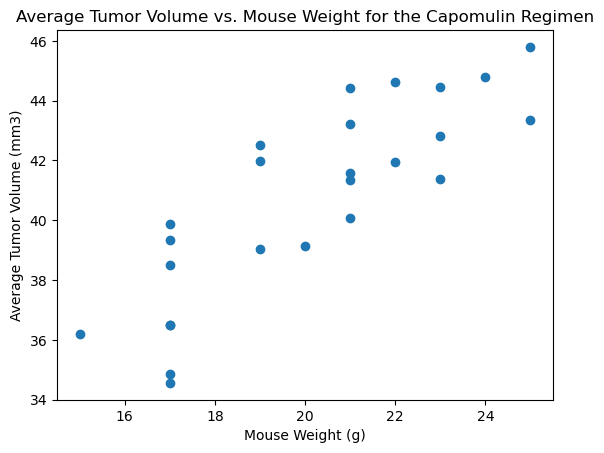

In [102]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']

average_tumor_vol = capomulin_df.groupby('Mouse ID')["Tumor Volume (mm3)"].mean().reset_index()

unique_weights = clean_data_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_df = pd.merge(average_tumor_vol, unique_weights, on='Mouse ID')

plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')

plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


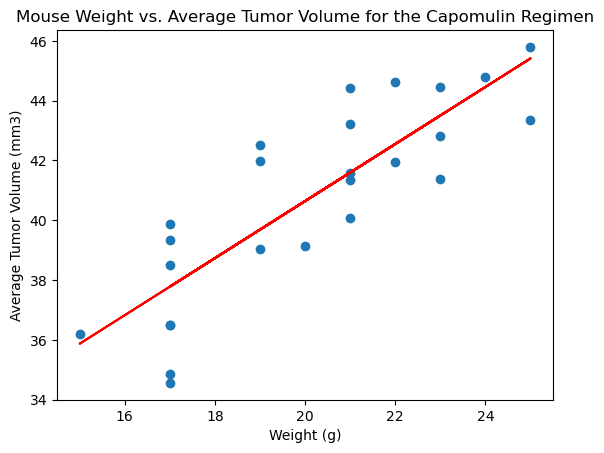

In [108]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']

avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

merged_df = pd.merge(avg_tumor_vol, capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

x_values = merged_df['Weight (g)']
y_values = merged_df['Tumor Volume (mm3)']

correlation = st.pearsonr(x_values, y_values)

print(f"The correlation between mouse weight and average tumor volume is {correlation[0]:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')

plt.show()
